In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict, GridSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, validation_curve, StratifiedShuffleSplit
from sklearn import metrics

In [2]:
# The three datasets created during the feature selection process are uploaded. 
# Each dataset contains a different ordering of the feature variables based on their importance.

featuresMIC = pd.read_csv('featuresRankedMIC.csv')
featuresFC = pd.read_csv('featuresRankedFC.csv')
featuresRFC = pd.read_csv('featuresRankedRFC.csv')

# Mutual Information Gain

In [6]:
# The top 20 features will be selected from each dataset for machine learning.

X = featuresMIC.iloc[:,0:20]
y = featuresMIC['WinningRecord']

In [32]:
featuresMIC.iloc[:,0:20].head()

,ERA+,OPS+,RA/G,SV,1Run,Under500,BB_P,H_P,R/G,#a-tA-S,DefEff,HR_P,BatAge,BB,WP,HR,SOS,IP,Rtot,IBB
0,0.173913,0.44,0.477612,0.302094,0.559387,0.402703,0.429180,0.622353,0.339394,0.45,0.602041,0.418914,0.292135,0.465585,0.687796,0.380797,0.545455,0.678982,0.391473,0.288005
1,0.637681,0.32,0.000000,0.194577,0.390805,0.389189,0.154861,0.181001,0.133333,0.65,1.000000,0.123964,0.460674,0.410213,0.262041,0.213898,0.454545,0.697641,0.841085,0.380978
2,0.231884,0.56,0.300995,0.265422,0.641762,0.385135,0.429180,0.464920,0.363636,0.75,0.581633,0.189573,0.483146,0.440077,0.221357,0.303797,0.454545,0.710241,0.372093,0.322774
3,0.275362,0.36,0.161692,0.100396,0.618774,0.271622,0.688073,0.159225,0.000000,0.40,0.867347,0.142855,0.505618,0.021753,0.435667,0.126699,0.454545,0.680184,0.569767,0.343635
4,0.594203,0.46,0.208955,0.390013,0.392720,0.528378,0.204570,0.482468,0.442424,0.60,0.663265,0.233241,0.606742,0.540521,0.218771,0.335165,0.363636,0.752545,0.441860,0.520958


In [7]:
# A stratified train-test split is performed on the dataset, with 80% of the data assigned to training set and 20% assigned to testing set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


In [8]:
clf = LogisticRegression()
cross_val_score(clf, X_train, y_train, cv=10)
np.mean(cross_val_score(clf, X_train, y_train, cv=10))

0.917583655083655

In [10]:
# Parameters for Logistic Regression algorithm

penalty = ['l1','none', 'l2']
solver = ['saga', 'liblinear', 'sag', 'lbfgs', 'newton-cg']

[0.93371139 0.93550515        nan        nan        nan]


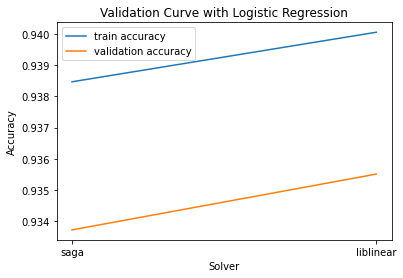

In [11]:
# 10-fold cross validation is performed on the training set for parameter tuning.
# The l1 penalty term has shown to provide the highest accuracy results, and the solver algorithm will be tested for accuracy

train_scores, valid_scores = validation_curve(LogisticRegression(max_iter=5000, penalty='l1'), X_train, y_train, param_name="solver", param_range=solver, scoring='accuracy', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("Solver")
plt.ylabel("Accuracy")
plt.plot(solver, train_scores_mean, label="train accuracy")
plt.plot(solver, valid_scores_mean, label="validation accuracy")

plt.legend()
plt.show()

[0.02154933 0.02178198        nan        nan        nan]


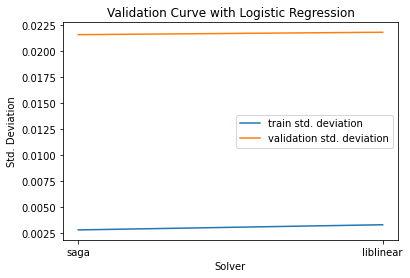

In [12]:
# The standard deviation also evaluated for each solver algorithm

train_scores, valid_scores = validation_curve(LogisticRegression(max_iter=5000, penalty='l1'), X_train, y_train, param_name="solver", param_range=solver, scoring='accuracy', cv=10)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

print(valid_scores_std)
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("Solver")
plt.ylabel("Std. Deviation")
plt.plot(solver, train_scores_std, label="train std. deviation")
plt.plot(solver, valid_scores_std, label="validation std. deviation")

plt.legend()
plt.show()

In [13]:
logreg = LogisticRegression(max_iter=5000, solver='liblinear', penalty='l1')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

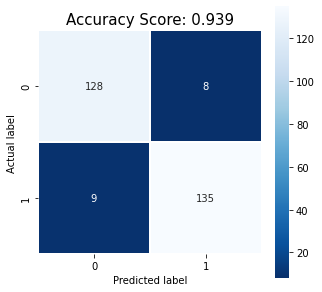

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(y_test, y_pred),3))
plt.title(all_sample_title, size = 15);

In [15]:
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,"\n" "FP: ",fp,"\n" "TN: ", tn,"\n" "FN: ",fn)
print()
print(classification_report(y_test, y_pred))

TP:  135 
FP:  8 
TN:  128 
FN:  9

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       136
           1       0.94      0.94      0.94       144

    accuracy                           0.94       280
   macro avg       0.94      0.94      0.94       280
weighted avg       0.94      0.94      0.94       280



# ANOVA F-Test

In [16]:
# The above process is now repeated for the top 20 features as selected by the ANOVA F-test selection algorithm.

X = featuresFC.iloc[:,0:20]
y = featuresFC['WinningRecord']

In [17]:
featuresFC.iloc[:,0:20].head()

,ERA+,RA/G,OPS+,1Run,H_P,SV,BB_P,#a-tA-S,R/G,DefEff,Rtot,Under500,IP,BB,PAge,PA,IBB,BatAge,HR_P,SF
0,0.173913,0.477612,0.44,0.559387,0.622353,0.302094,0.429180,0.45,0.339394,0.602041,0.391473,0.402703,0.678982,0.465585,0.405941,0.594126,0.288005,0.292135,0.418914,0.358281
1,0.637681,0.000000,0.32,0.390805,0.181001,0.194577,0.154861,0.65,0.133333,1.000000,0.841085,0.389189,0.697641,0.410213,0.465347,0.356231,0.380978,0.460674,0.123964,0.398932
2,0.231884,0.300995,0.56,0.641762,0.464920,0.265422,0.429180,0.75,0.363636,0.581633,0.372093,0.385135,0.710241,0.440077,0.475248,0.523644,0.322774,0.483146,0.189573,0.538171
3,0.275362,0.161692,0.36,0.618774,0.159225,0.100396,0.688073,0.40,0.000000,0.867347,0.569767,0.271622,0.680184,0.021753,0.336634,0.279588,0.343635,0.505618,0.142855,0.124424
4,0.594203,0.208955,0.46,0.392720,0.482468,0.390013,0.204570,0.60,0.442424,0.663265,0.441860,0.528378,0.752545,0.540521,0.455446,0.566620,0.520958,0.606742,0.233241,0.443268


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

[0.93102477 0.93462033        nan        nan        nan]


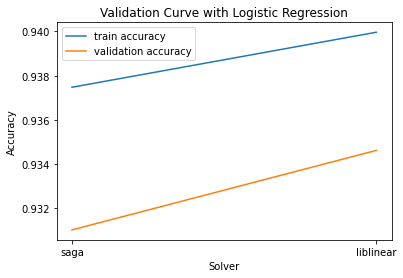

In [19]:
train_scores, valid_scores = validation_curve(LogisticRegression(max_iter=5000, penalty='l1'), X_train, y_train, param_name="solver", param_range=solver, scoring='accuracy', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("Solver")
plt.ylabel("Accuracy")
plt.plot(solver, train_scores_mean, label="train accuracy")
plt.plot(solver, valid_scores_mean, label="validation accuracy")

plt.legend()
plt.show()

[0.02074305 0.02490883        nan        nan        nan]


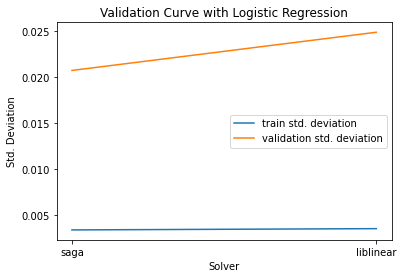

In [20]:
train_scores, valid_scores = validation_curve(LogisticRegression(max_iter=5000, penalty='l1'), X_train, y_train, param_name="solver", param_range=solver, scoring='accuracy', cv=10)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

print(valid_scores_std)
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("Solver")
plt.ylabel("Std. Deviation")
plt.plot(solver, train_scores_std, label="train std. deviation")
plt.plot(solver, valid_scores_std, label="validation std. deviation")

plt.legend()
plt.show()

In [21]:
logreg = LogisticRegression(max_iter=5000, solver='liblinear', penalty='l1')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

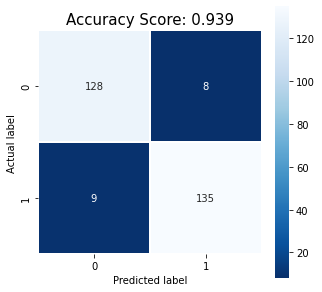

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(y_test, y_pred),3))
plt.title(all_sample_title, size = 15);

In [23]:
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,"\n" "FP: ",fp,"\n" "TN: ", tn,"\n" "FN: ",fn)
print()
print(classification_report(y_test, y_pred))

TP:  135 
FP:  8 
TN:  128 
FN:  9

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       136
           1       0.94      0.94      0.94       144

    accuracy                           0.94       280
   macro avg       0.94      0.94      0.94       280
weighted avg       0.94      0.94      0.94       280



# Random Forest

In [24]:
# The above process is now repeated for the top 20 features as selected by the Random Forest selection algorithm.

X = featuresRFC.iloc[:,0:20]
y = featuresRFC['WinningRecord']

In [25]:
featuresRFC.iloc[:,0:20].head()

,ERA+,OPS+,RA/G,R/G,1Run,SV,H_P,BB_P,#a-tA-S,Under500,DefEff,Rtot,PA,IP,BB,PAge,HR_P,HR,BatAge,IBB
0,0.173913,0.44,0.477612,0.339394,0.559387,0.302094,0.622353,0.429180,0.45,0.402703,0.602041,0.391473,0.594126,0.678982,0.465585,0.405941,0.418914,0.380797,0.292135,0.288005
1,0.637681,0.32,0.000000,0.133333,0.390805,0.194577,0.181001,0.154861,0.65,0.389189,1.000000,0.841085,0.356231,0.697641,0.410213,0.465347,0.123964,0.213898,0.460674,0.380978
2,0.231884,0.56,0.300995,0.363636,0.641762,0.265422,0.464920,0.429180,0.75,0.385135,0.581633,0.372093,0.523644,0.710241,0.440077,0.475248,0.189573,0.303797,0.483146,0.322774
3,0.275362,0.36,0.161692,0.000000,0.618774,0.100396,0.159225,0.688073,0.40,0.271622,0.867347,0.569767,0.279588,0.680184,0.021753,0.336634,0.142855,0.126699,0.505618,0.343635
4,0.594203,0.46,0.208955,0.442424,0.392720,0.390013,0.482468,0.204570,0.60,0.528378,0.663265,0.441860,0.566620,0.752545,0.540521,0.455446,0.233241,0.335165,0.606742,0.520958


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

[0.93102477 0.93462033        nan        nan        nan]


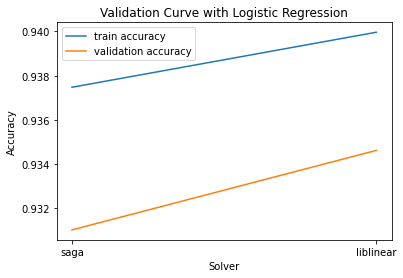

In [27]:
train_scores, valid_scores = validation_curve(LogisticRegression(max_iter=5000, penalty='l1'), X_train, y_train, param_name="solver", param_range=solver, scoring='accuracy', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("Solver")
plt.ylabel("Accuracy")
plt.plot(solver, train_scores_mean, label="train accuracy")
plt.plot(solver, valid_scores_mean, label="validation accuracy")

plt.legend()
plt.show()

[0.02074305 0.02490883        nan        nan        nan]


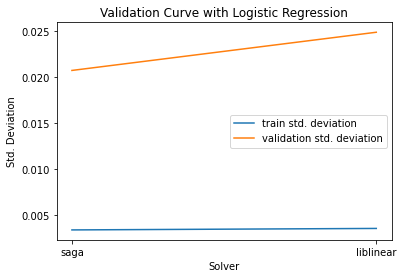

In [28]:
train_scores, valid_scores = validation_curve(LogisticRegression(max_iter=5000, penalty='l1'), X_train, y_train, param_name="solver", param_range=solver, scoring='accuracy', cv=10)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

print(valid_scores_std)
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("Solver")
plt.ylabel("Std. Deviation")
plt.plot(solver, train_scores_std, label="train std. deviation")
plt.plot(solver, valid_scores_std, label="validation std. deviation")

plt.legend()
plt.show()

In [29]:
logreg = LogisticRegression(max_iter=5000, solver='liblinear', penalty='l1')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

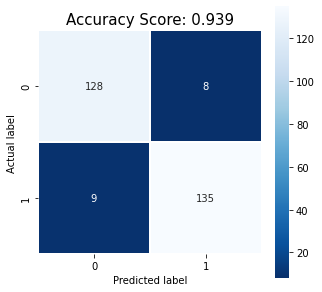

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(y_test, y_pred),3))
plt.title(all_sample_title, size = 15);

In [31]:
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,"\n" "FP: ",fp,"\n" "TN: ", tn,"\n" "FN: ",fn)
print()
print(classification_report(y_test, y_pred))

TP:  135 
FP:  8 
TN:  128 
FN:  9

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       136
           1       0.94      0.94      0.94       144

    accuracy                           0.94       280
   macro avg       0.94      0.94      0.94       280
weighted avg       0.94      0.94      0.94       280

